
# CALIFORNIA HOUSE PRICE PREDICTION

## INTRODUCTION

The purpose of this file is to find the best model for predicting house prices in California. We are provided with a dataset which contains features and the price. The file is called housing.csv and is in the folder. This is a version of the data based on this source.

http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

Some of the data fields are log scaled values so should not be interpeted literally, e.g. number of bedrooms is not the number of bedrooms but the log of number of bedrooms divided by population.

In the following we are to 


1 - Load the data into a Pandas dataframe

2 - Examine the dataframe for missing data and decide how to treat these

3 - Visualise the target price and make any adjustments that you think would help. 

4 - Try to see which features have the best explanatory power. 

5 - Also, deal with categorical data and use feature standardization

6 - Choose metrics for model evaluation

7 - Use the following models - Linear Regression, Decision Tree Regressor

8 - Use training and testing to identify the best model

9 - Write a summary explaining your results.

In [64]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://static.wixstatic.com/media/f38465_32890e0dce8b499f976874dd3c455561~mv2.jpg")

## Load the data

In [65]:
# Import python librairies
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, suppress = True)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn-colorblind")
import seaborn as sns
import mpl_toolkits
import math

In [66]:
# Import data from csv file into a dataframe
df = pd.read_csv("/Users/Jeremymeyer/Desktop/MSc Financial Markets/Data & Machine Learning/Coursework II/data/housing.csv")

In [67]:
# Visualize head
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


As we can see, we have some information about the location of the neighbourhood (longitude, latitude), the size of the population, the number of households, the median house price and many other aspects such as ocean proximity. 

In [68]:
# Visualize tail
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [70]:
# Check is there is any missing value in the overall dataframe
df.isnull().any().any()

True

In [71]:
# Identify where the missing values are
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [72]:
averagetotalbedrooms = df['total_bedrooms'].mean()

In [73]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(averagetotalbedrooms)

In [74]:
# Check again
df.isnull().any().any()

False

## Data Visualization and Data Analysis

First, let's get a description of the features to know more about the data set:

In [75]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


###  Geospatial analysis 

We have latitude and longitude on the dataset for each neighbourhood. Let's look at the most common location. 

/Users/Jeremymeyer/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 720x504 with 0 Axes>

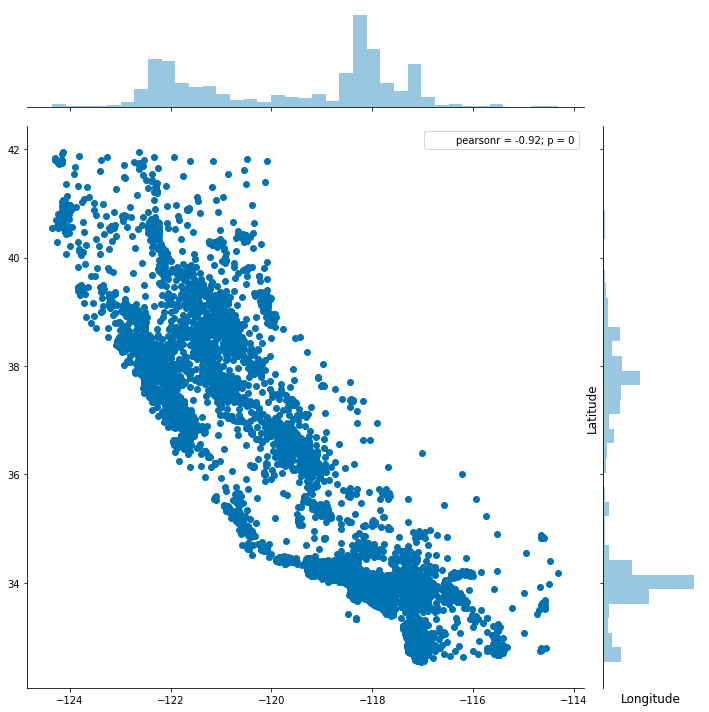

In [76]:
plt.figure(figsize=(10,7));
sns.jointplot(x=df.longitude.values,y=df.latitude.values, size=10);
plt.ylabel('Latitude',fontsize=12);
plt.xlabel('Longitude',fontsize=12);

Jointplot function is useful to see the concentration of houses in the overall area. 

Example: for latitude between 33 and 34 and for  longitude between -117 and -118, we  obverve a high concentration of data point. It represents the county of Los Angeles, one of the most populated county in the United States.  

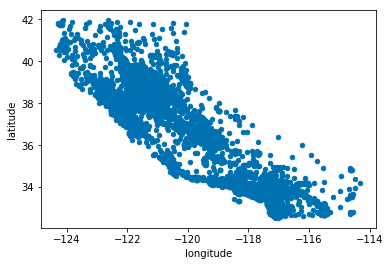

In [77]:
# We found another powerful way to visualize the location of the houses. 
df.plot(kind="scatter", x="longitude", y="latitude");

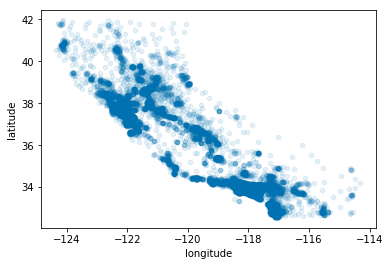

In [78]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1);

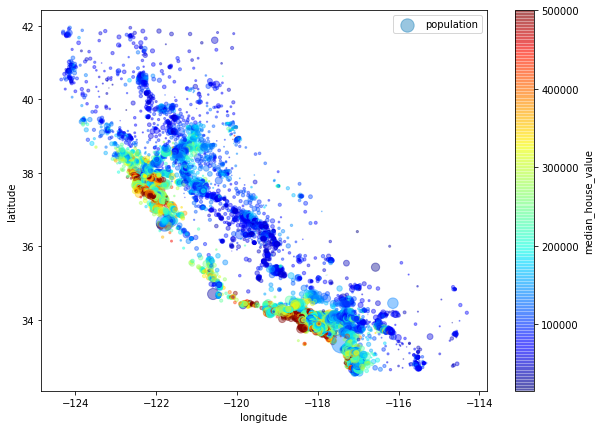

In [79]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False);
plt.legend();

Let's now try to visualize our data point in a map. We need a background picture with the right coordinates to match the above plot.
Let's import the picture using the google api and using jsfiddle. You will find the link to visualize the coordinates and import the image. 
https://jsfiddle.net/JM42509/2h4cxoav/2/
The code (in java script) is already embedded in the link. We could have done that in python, using geopandas and geojson. 

### Cleaning median housing prices

When we work on that kind of data, we first need to identify which columns are important and which are not. Let's look at the median house value that we have to predict. 

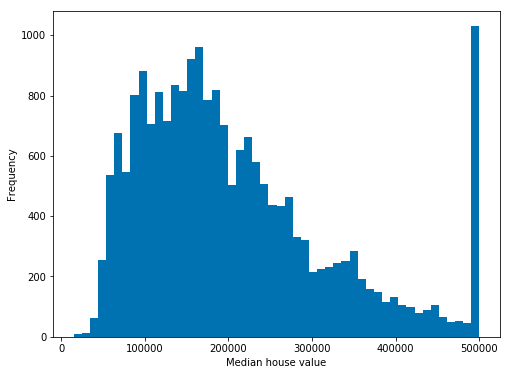

In [80]:
plt.figure(figsize=(8, 6))
plt.hist(df.median_house_value,bins=50);
plt.xlabel('Median house value')
plt.ylabel('Frequency');

In [81]:
# A number of properties have a price of 500000.0 - we drop these as they seem to be outliers
df = df[df.median_house_value<500000]

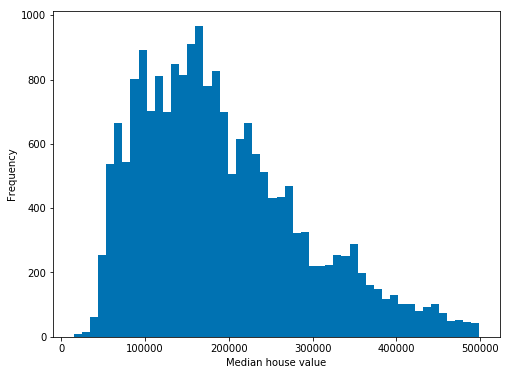

In [82]:
# Let us look again at what we have to predict 
plt.figure(figsize=(8, 6));
plt.hist(df.median_house_value,bins=50);
plt.xlabel('Median house value');
plt.ylabel('Frequency');

/Users/Jeremymeyer/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


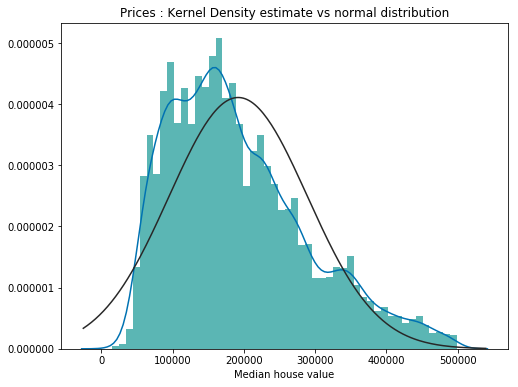

In [83]:
from scipy.stats import norm
plt.figure(figsize=(8, 6));
ax = sns.distplot(df["median_house_value"]);
ax2 = sns.distplot(df["median_house_value"], fit=norm, kde=False);
plt.xlabel('Median house value');
plt.title("Prices : Kernel Density estimate vs normal distribution");

Again, we can assume that the prices follow a log-norma distrituion (positive skew)

In [84]:
from scipy import stats
print(stats.describe(df["median_house_value"]))

DescribeResult(nobs=19648, minmax=(14999.0, 499100.0), mean=192055.3285830619, variance=9430518158.422287, skewness=0.7951707834025058, kurtosis=0.1215609407768019)


### 2/ Cleaning median age:

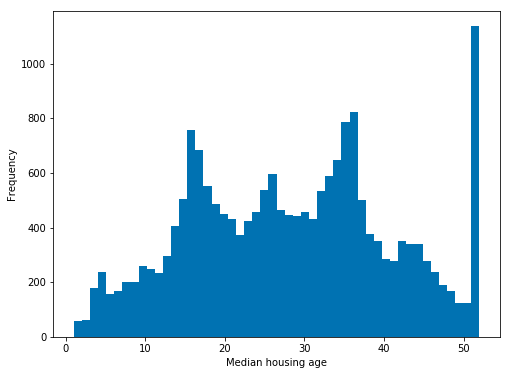

In [85]:
plt.figure(figsize=(8, 6))
plt.hist(df.housing_median_age,bins=50);
plt.xlabel('Median housing age')
plt.ylabel('Frequency');

In [86]:
# A number of properties have an age of 52 - we drop these as they seem to be outliers
df = df[df.housing_median_age<52]

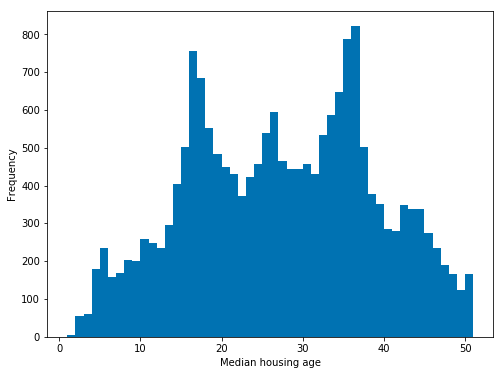

In [87]:
plt.figure(figsize=(8, 6))
plt.hist(df.housing_median_age,bins=50);
plt.xlabel('Median housing age')
plt.ylabel('Frequency');

### How the features are affecting the median prices of the houses ?

In [88]:
prices = df['median_house_value'] 

In [89]:
def plotFeatureName(featureName):
    plt.figure(figsize=(8,6))
    plt.scatter(df[featureName], prices)  
    plt.title(featureName)
    plt.xlabel(featureName)
    plt.ylabel('price')

### Histogramms

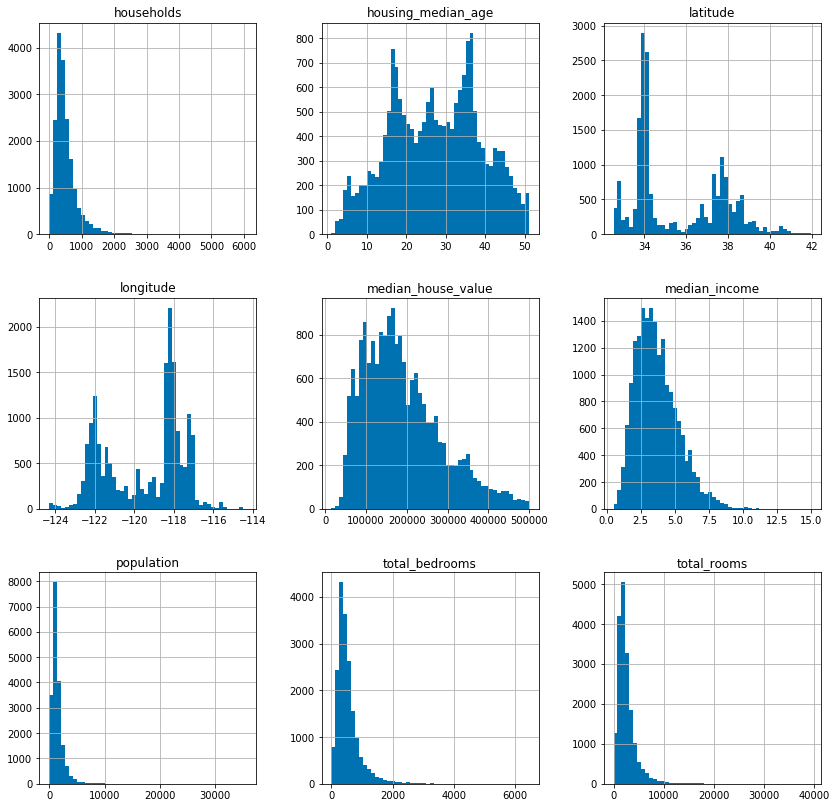

In [90]:
df.hist(bins=50, figsize=(14, 14));

### 1/ Median houses prices versus location:

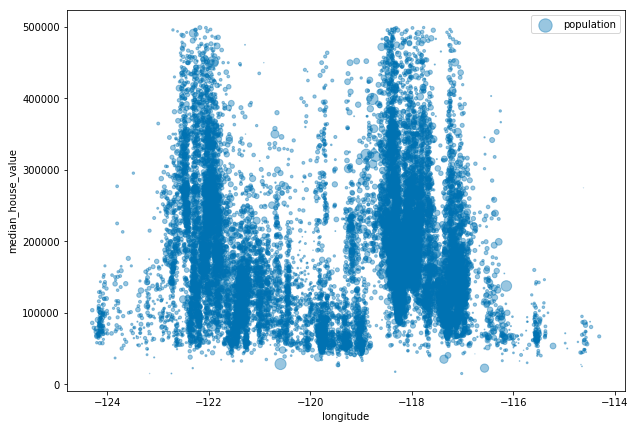

In [91]:
ax=df.plot(kind="scatter", x="longitude", y="median_house_value", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(10,7));

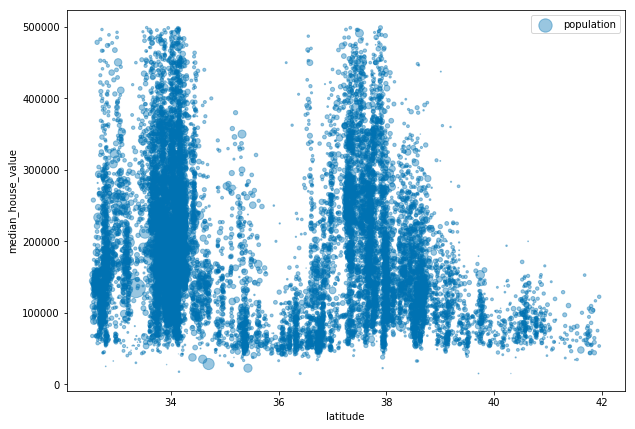

In [92]:
ax=df.plot(kind="scatter", x="latitude", y="median_house_value", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(10,7));

It gives us quite an interesting observation that the two main populous areas in California sell houses at a much higher amounts. Inequalities are  more important in those areas, as we can find both very high and low prices. Moreover, we can notice that the most expensive houses are only in those two areas and no where else in California. Concentration of inequalities is important. Example: only 20 minutes in car to reach Chesterfield Square (highest rate of violent crime in the city) from the Riviera Country Club (Annual membership fee: $250,000). 

(lat: 37.77 & long: -122.43): San Francisco area 

(lat: 34.05 & long: -118.24): Los Angeles area

### 2/ Median houses prices versus median income:

As we can see, median income affects the median prices of the house. 

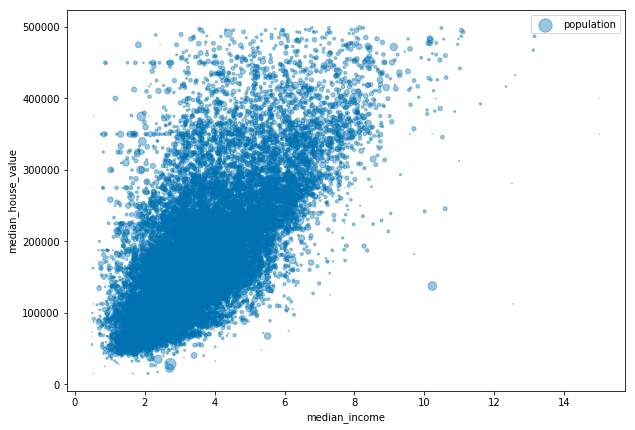

In [93]:
ax=df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(10,7));

/Users/Jeremymeyer/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


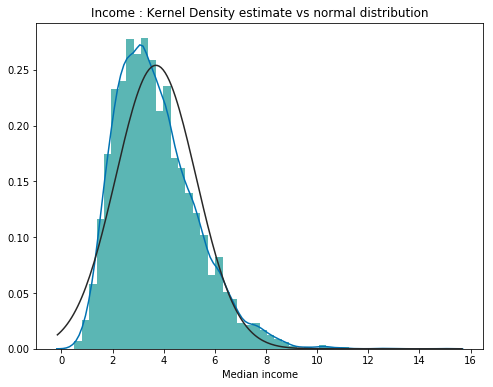

In [94]:
from scipy.stats import norm
plt.figure(figsize=(8, 6));
ax = sns.distplot(df["median_income"]);
ax2 = sns.distplot(df["median_income"], fit=norm, kde=False);
plt.xlabel('Median income');
plt.title("Income : Kernel Density estimate vs normal distribution");

In [95]:
from scipy import stats
print(stats.describe(df["median_income"]))

DescribeResult(nobs=18555, minmax=(0.4999, 15.0001), mean=3.6931936620856916, variance=2.465513206500736, skewness=0.8907334009409011, kurtosis=1.2965751343733753)


### 3/ Median houses prices versus median age:

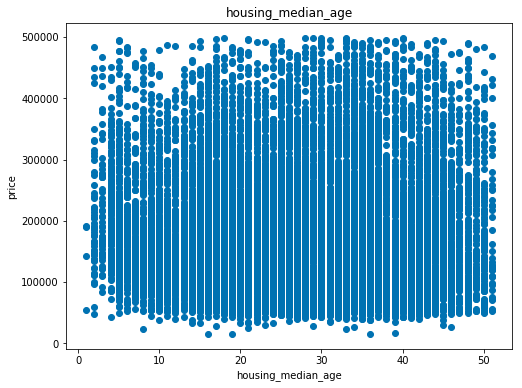

In [96]:
plotFeatureName('housing_median_age')

On the contrary, some factors appear irrelevant when it comes to visualize the relationship with median housing prices.

/Users/Jeremymeyer/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


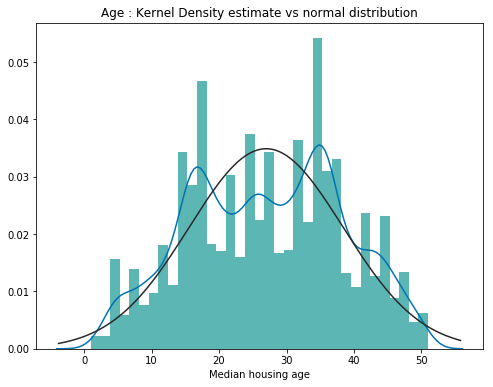

In [97]:
from scipy.stats import norm
plt.figure(figsize=(8, 6));
ax = sns.distplot(df["housing_median_age"]);
ax2 = sns.distplot(df["housing_median_age"], fit=norm, kde=False);
plt.xlabel('Median housing age');
plt.title("Age : Kernel Density estimate vs normal distribution");

In [98]:
from scipy import stats
print(stats.describe(df["median_income"]))

DescribeResult(nobs=18555, minmax=(0.4999, 15.0001), mean=3.6931936620856916, variance=2.465513206500736, skewness=0.8907334009409011, kurtosis=1.2965751343733753)


### 4/ Most common house

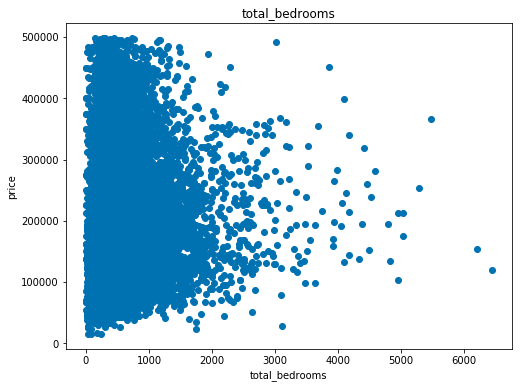

In [99]:
plotFeatureName('total_bedrooms')

That plot does not tell us a lot. We can see that a very low concentration of total bedrooms can both mean high prices or low prices. Let's now consider the total number of rooms against the total number of bedrooms and take into account also the population and the median house value. 

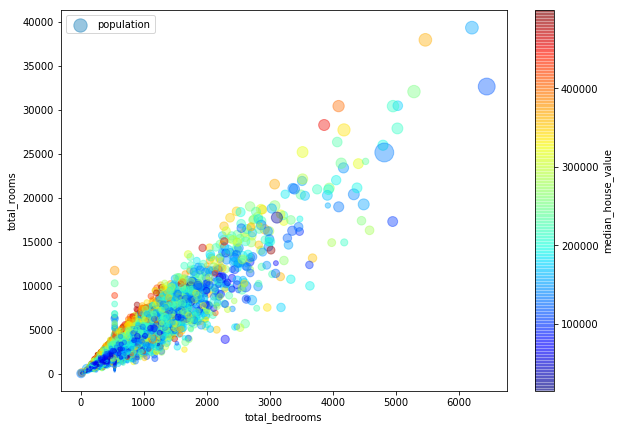

In [100]:
ax=df.plot(kind="scatter", x="total_bedrooms", y="total_rooms", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False);

One can see that locations with a high number of total rooms and a relative low number of bedrooms are much more expensive. 

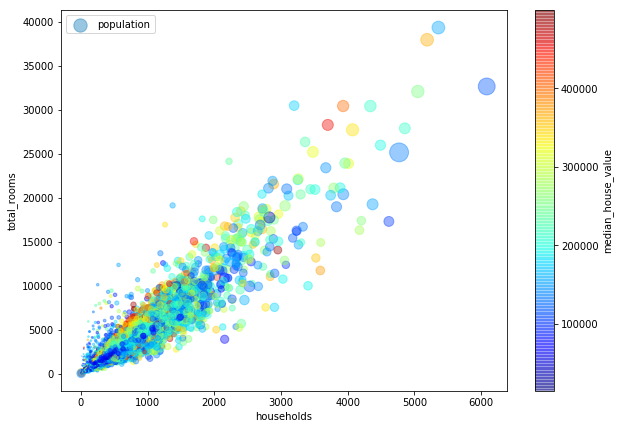

In [101]:
ax=df.plot(kind="scatter", x="households", y="total_rooms", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False);

One can also see that locations with a high number of total rooms and a relative households can be more expensive. On the contrary, some places with same apparent characteristics are less expensive. 

### 5/ Housing categories

In [102]:
df['ocean_proximity'].value_counts()

<1H OCEAN     8322
INLAND        6343
NEAR OCEAN    2322
NEAR BAY      1566
ISLAND           2
Name: ocean_proximity, dtype: int64

In [103]:
# using a one hot encoder
one_hot = pd.get_dummies(df['ocean_proximity'])
df = df.join(one_hot)

In [104]:
housing_cat = df['ocean_proximity']
df['ocean_proximity'].value_counts()
housing_cat_encoded, housing_categories = housing_cat.factorize()

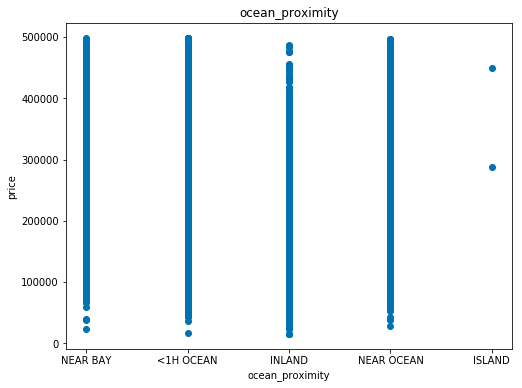

In [105]:
plotFeatureName('ocean_proximity')

### 6/ Population

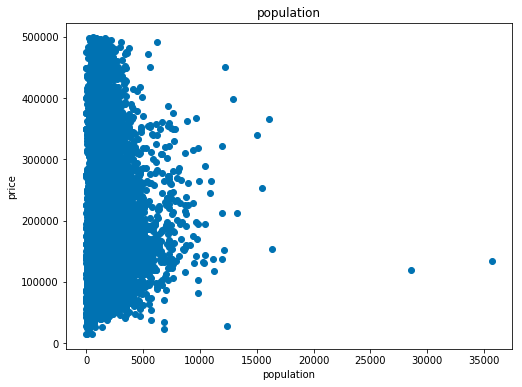

In [106]:
plotFeatureName('population')

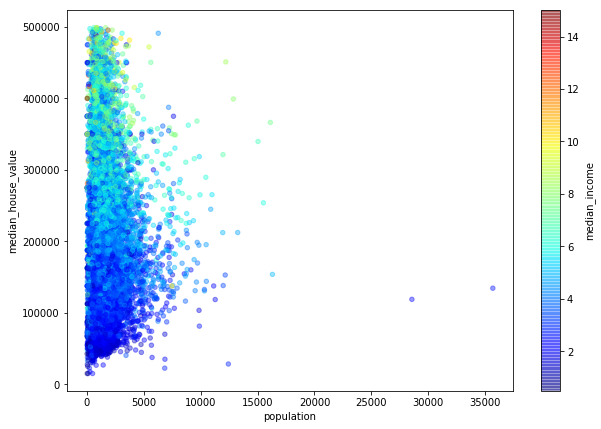

In [107]:
ax=df.plot(kind="scatter", x="population", y="median_house_value", alpha=0.4, figsize=(10,7),
    c="median_income", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False);

### Correlation

In [108]:
# How does the correlation matrix look 
df.corr(method='pearson')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.922738,-0.034155,0.035449,0.064662,0.091001,0.050711,-0.016118,-0.022901,0.290948,-0.087812,0.005688,-0.419891,0.041148
latitude,-0.922738,1.000000,-0.051712,-0.027361,-0.064309,-0.107190,-0.070150,-0.075389,-0.171565,-0.431848,0.381698,-0.010655,0.313663,-0.161259
housing_median_age,-0.034155,-0.051712,1.000000,-0.374769,-0.329259,-0.280741,-0.310650,-0.203107,0.014121,0.107206,-0.221366,0.000925,0.141945,0.036916
total_rooms,0.035449,-0.027361,-0.374769,1.000000,0.932211,0.860131,0.921938,0.223377,0.153887,-0.014291,0.027302,-0.006879,-0.004495,-0.013666
total_bedrooms,0.064662,-0.064309,-0.329259,0.932211,1.000000,0.876406,0.973661,0.021286,0.079425,0.013117,-0.011437,-0.004383,-0.008649,0.004084
population,0.091001,-0.107190,-0.280741,0.860131,0.876406,1.000000,0.910689,0.040688,0.022542,0.071823,-0.036873,-0.007924,-0.038726,-0.022314
households,0.050711,-0.070150,-0.310650,0.921938,0.973661,0.910689,1.000000,0.045824,0.100565,0.039600,-0.046317,-0.006841,0.001531,0.005804
median_income,-0.016118,-0.075389,-0.203107,0.223377,0.021286,0.040688,0.045824,1.000000,0.664340,0.184491,-0.225912,-0.008677,0.060642,-0.004128
median_house_value,-0.022901,-0.171565,0.014121,0.153887,0.079425,0.022542,0.100565,0.664340,1.000000,0.317193,-0.501309,0.019534,0.111744,0.147385
<1H OCEAN,0.290948,-0.431848,0.107206,-0.014291,0.013117,0.071823,0.039600,0.184491,0.317193,1.000000,-0.649930,-0.009363,-0.273794,-0.341070


In [109]:
corr_matrix = df.corr()

In [110]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.664340
<1H OCEAN             0.317193
total_rooms           0.153887
NEAR OCEAN            0.147385
NEAR BAY              0.111744
households            0.100565
total_bedrooms        0.079425
population            0.022542
ISLAND                0.019534
housing_median_age    0.014121
longitude            -0.022901
latitude             -0.171565
INLAND               -0.501309
Name: median_house_value, dtype: float64

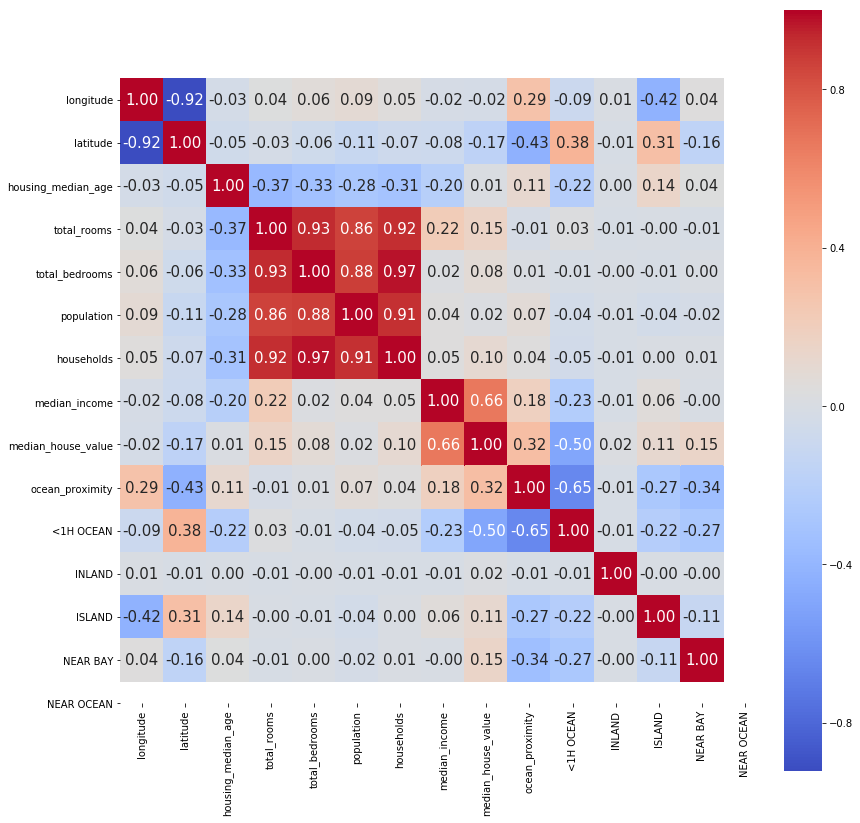

In [111]:
plt.figure(figsize=(14,14))
sns.heatmap(corr_matrix, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df.columns.values.tolist(), yticklabels= df.columns.values.tolist(),
           cmap= 'coolwarm');

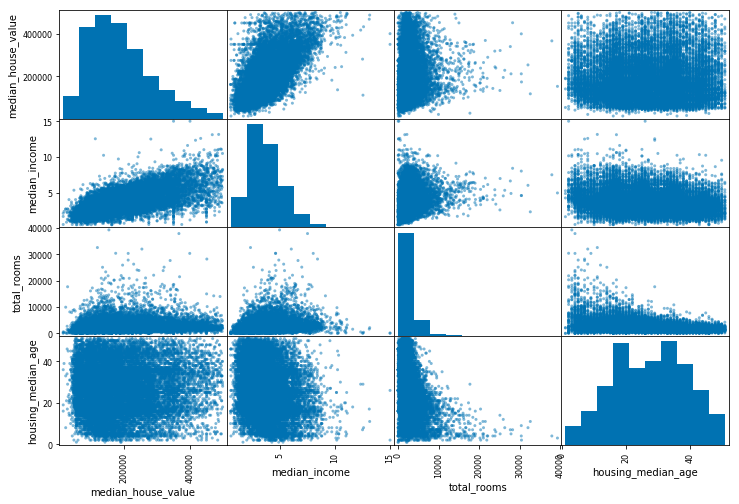

In [112]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8));

In [113]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

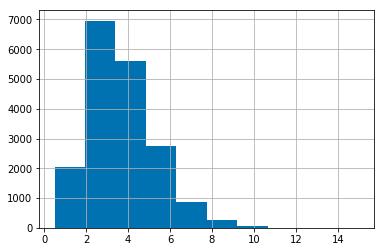

In [114]:
# make sure equal samlping by median income groups
df["median_income"].hist()
df["income_cat"]=np.ceil(df["median_income"]/1.5)
df["income_cat"].where(df["income_cat"]>5,5.0,inplace=True)

## Building a Model

In [115]:
# Let's start by looking at the data 
X = df

Our taget variable is median_house value, and so all the other columns are features. Now split the data into X and y variables where X considered as features and y target variable

In [116]:
y = X['median_house_value']

In [117]:
# Can't have price as a feature
X = X.drop('median_house_value',axis=1)
# You only want floating values (no string)
X = X.drop('ocean_proximity',axis=1)

In [118]:
# We use feature standardization
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)

In [119]:
print(X.shape,y.shape)

(18555, 17) (18555,)


In [120]:
#We could have reduced the number of features using PCA: 
#from sklearn.decomposition import PCA
#pcaModel=PCA(n_components=2)
#pcaModel.fit(X)
#X_pca=pcaModel.transform(X)
#X=X_pca

# Data Analysis

## Train Test Split:

One way to improve the learning and to avoid overfitting is to partition the data into a training set and a test set. A typical partition is 70% training and 30% testing.

### I-Linear Regression model

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.30, random_state = 999)
# X is the feature data matrix
# y is the vector lables
# The random state is just a seed to allow reproductibiliy
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12988, 17)
(5567, 17)
(12988,)
(5567,)


Let's assume that the predicted variable y for a given sample j is a linear combination of the n element vector of variables $x^j$

$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_p x_p$

We have set: $\theta_0=1$

Fitting the model means finding coefficients that best fit the data. We minimise the squared differences between true value and prediction. 

In [122]:
# Load linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [123]:
# Fit to the training data
lin_reg.fit(X_train, y_train)

/Users/Jeremymeyer/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [124]:
lin_reg.coef_

array([-4.5864e+04, -4.5447e+04,  8.2835e+03, -3.8878e+03,  3.9502e+03,
       -3.4580e+04,  3.9234e+04,  6.1252e+04, -2.9832e+17, -2.8452e+17,
       -6.2272e+15, -1.6674e+17, -1.9847e+17,  4.8461e+03,  9.0926e+03,
        3.8135e+03, -1.0423e+03])

In [125]:
lin_reg.intercept_

189769.30190573208

In [126]:
y_pred = lin_reg.predict(X_test)

In [127]:
print('Predicted Value :',y_pred[0])
print('Actual Value :',y_test.values[0])

Predicted Value : 209108.6776647374
Actual Value : 210200.0


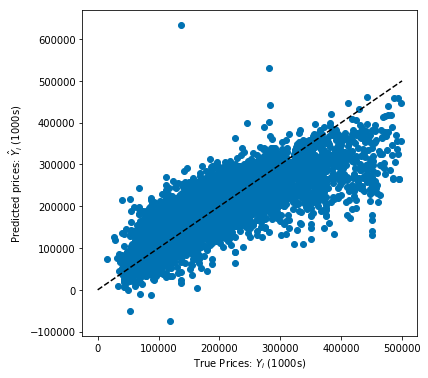

In [128]:
plt.figure(figsize=(6,6));
plt.scatter(y_test, y_pred);
plt.xlabel("True Prices: $Y_i$ (1000s)");
plt.ylabel("Predicted prices: $\hat{Y}_i$ (1000s)");
plt.plot([0, 500001], [0, 500001], '--k');

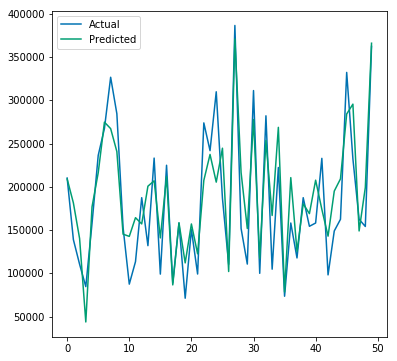

In [129]:
res_lreg = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
res_lreg = res_lreg.reset_index()
res_lreg = res_lreg.drop(['index'],axis=1)

plt.figure(figsize=(6,6));
plt.plot(res_lreg[:50]);
plt.legend(['Actual','Predicted']);

In [130]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [131]:
y_train_pred = lin_reg.predict(X_train);
y_test_pred = lin_reg.predict(X_test)
dfLinearRegression = pd.DataFrame([(np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_test, y_test_pred))),
                    (r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)),
                    (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_test, y_test_pred))],
                   index=['Root Mean Squared Error (RMSE)', 'Coefficient of determination (R-squared)', 'Mean Absolute Error (MAE)'],
                   columns=('Training set', 'Test set'))
dfLinearRegression

,Training set,Test set
Root Mean Squared Error (RMSE),58686.419052,56621.195980
Coefficient of determination (R-squared),0.621779,0.646539
Mean Absolute Error (MAE),42859.490977,42150.453940


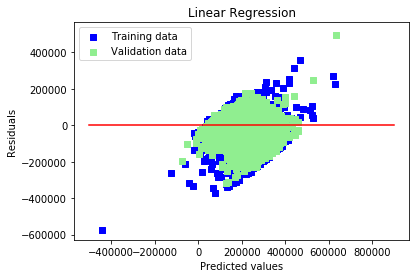

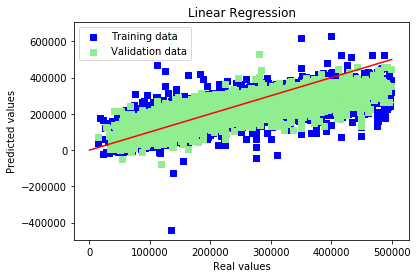

In [132]:
# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear Regression")
plt.plot([-500000, 900000], [0, 0], c = "red")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.show()

# Plot predictions
plt.scatter(y_train,y_train_pred, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test,y_test_pred, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear Regression")
plt.ylabel("Predicted values")
plt.plot([0, 500000], [0, 500000], c = "red")
plt.xlabel("Real values")
plt.legend(loc = "upper left")
plt.show() 

### II-Decision Tree Regressor model

Decision Tree Regression is a rule based technique. A Decision Tree splits the input features in several regions and assigns a prediction value to each region. The selection of the regions and the predicted value within a region are chosen in order to produce the prediction which best fits the data. Where for best fit we mean that it minimises the distance of the observations from the prediction. 

In [133]:
from sklearn.tree import DecisionTreeRegressor

In [134]:
decisiontree_reg = DecisionTreeRegressor()
decisiontree_reg.fit(X_train, y_train)
y_pred = decisiontree_reg.predict(X_test)

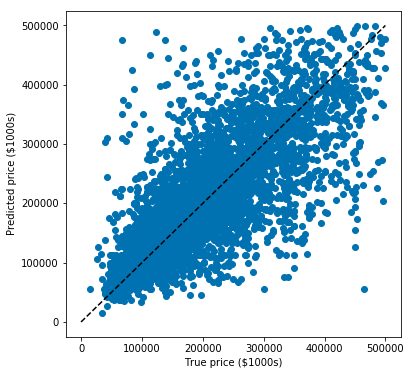

In [135]:
plt.figure(figsize=(6,6));
plt.scatter(y_test, y_pred);
plt.plot([0, 500000], [0, 500000], '--k');
plt.axis('tight');
plt.xlabel('True price ($1000s)');
plt.ylabel('Predicted price ($1000s)');

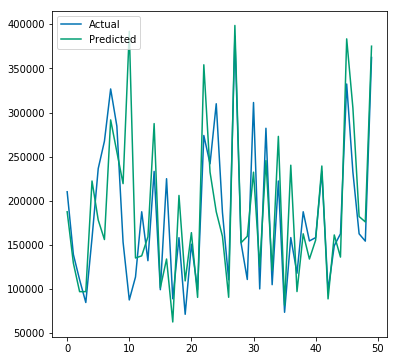

In [136]:
res_decisiontreereg = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
res_decisiontreereg = res_decisiontreereg.reset_index()
res_decisiontreereg = res_decisiontreereg.drop(['index'],axis=1)

plt.figure(figsize=(6,6));
plt.plot(res_decisiontreereg[:50]);
plt.legend(['Actual','Predicted']);

In [137]:
y_train_pred = decisiontree_reg.predict(X_train);
y_test_pred = decisiontree_reg.predict(X_test)
dfDecisionTreeRegressor = pd.DataFrame([(np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_test, y_test_pred))),
                    (r2_score(y_train, y_train_pred),     r2_score(y_test, y_test_pred)),
                    (mean_absolute_error(y_train, y_train_pred),   mean_absolute_error(y_test, y_test_pred))],
                   index=['Root Mean Squared Error (RMSE)', 'Coefficient of determination (R-squared)', 'Mean Absolute Error (MAE)'],
                   columns=('Training set', 'Test set'))
dfDecisionTreeRegressor

,Training set,Test set
Root Mean Squared Error (RMSE),0.0,62816.369405
Coefficient of determination (R-squared),1.0,0.564960
Mean Absolute Error (MAE),0.0,41949.686007


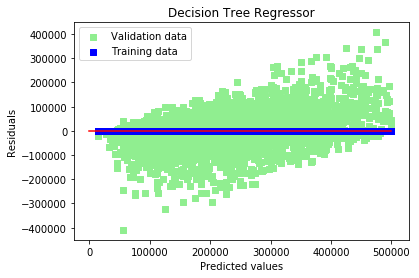

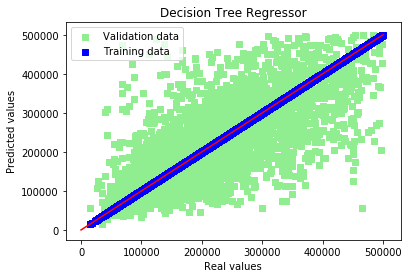

In [138]:
# Plot residuals
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.plot([0, 500000], [0, 0], c = "red")
plt.title("Decision Tree Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.show()

# Plot predictions
plt.scatter(y_test,y_test_pred, c = "lightgreen", marker = "s", label = "Validation data")
plt.scatter(y_train,y_train_pred, c = "blue", marker = "s", label = "Training data")
plt.plot([0, 500000], [0, 500000], c = "red")
plt.title("Decision Tree Regressor")
plt.ylabel("Predicted values")
plt.xlabel("Real values")
plt.legend(loc = "upper left")
plt.show()  

The decision tree is used to fit a sine curve with addition noisy observation. As a result, it learns local linear regressions approximating the sine curve.

We can see that if the maximum depth of the tree (controlled by the max_depth parameter) is set too high, the decision trees learn too fine details of the training data and learn from the noise, i.e. they overfit. This is obviously what happened previously. Let's look at the R-squared: around 0.57 for the testing set and 1 for the training test. In comparison, we have 0.65 for the testing set and 0.62 for the training test when we do a linear regression. 
We prefer to get a better R-squared between the testing and the training set. We do not believe it is efficient when we increase the R-squared for the training set and it decreases at the same time the R-Squared for the testing set.

Growing a tree involves deciding on which features choosing and which conditions using for splitting, as well as knowing when to stop. As a tree generally grows arbitrarily, we will need to trim it down for it to look beautiful.

Let's now visualize a decision tree with graphviz and max_depth parameter equals to 2.

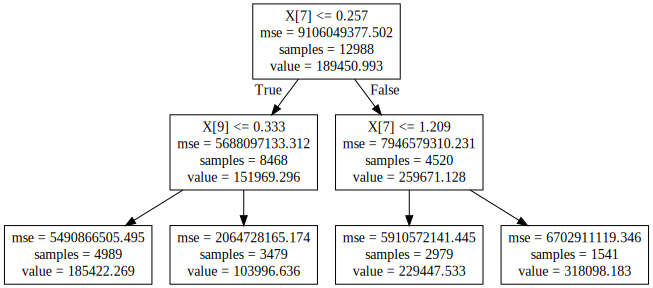

In [139]:
# Decision tree with graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from os import system
from graphviz import Source
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train, y_train)
from IPython.display import SVG
graph = Source(export_graphviz(regressor, out_file=None))
SVG(graph.pipe(format='svg'))

Summary: Linear regression is a linear model, which means it works really nicely when the data has a linear shape. But, when the data has a non-linear shape, then a linear model cannot capture the non-linear features.

So in this case, you can use the decision trees, which do a better job at capturing the non-linearity in the data by dividing the space into smaller sub-spaces depending on the questions asked. However, the decision trees can sometimes learn too fine details of the training data and learn from the noise, i.e. they overfit. This is obviously what happened previously. 

Let's now compare the linear regression and decision tree to two other regressions : Gradient Boosting Regression and Random Forest Regression. 

### III-Gradient Boosting Regression

In [140]:
from sklearn.ensemble import GradientBoostingRegressor

In [141]:
gbp_reg = GradientBoostingRegressor()
gbp_reg.fit(X_train, y_train)
y_pred = gbp_reg.predict(X_test)

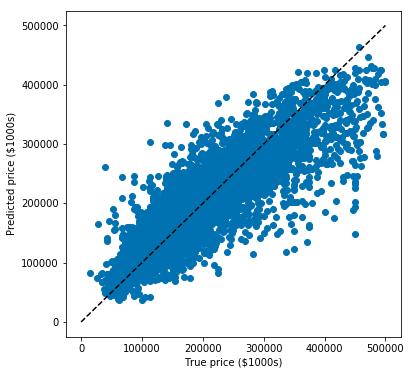

In [142]:
plt.figure(figsize=(6,6));
plt.scatter(y_test, y_pred);
plt.plot([0, 500001], [0, 500001], '--k');
plt.axis('tight');
plt.xlabel('True price ($1000s)');
plt.ylabel('Predicted price ($1000s)');

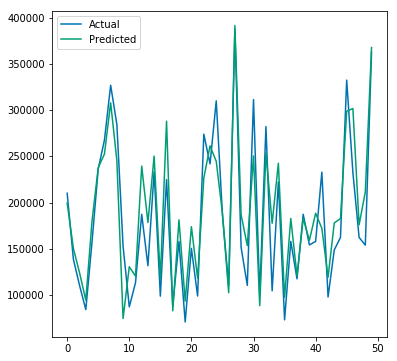

In [143]:
res_gbp = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
res_gbp = res_gbp.reset_index()
res_gbp = res_gbp.drop(['index'],axis=1)

plt.figure(figsize=(6,6));
plt.plot(res_gbp[:50]);
plt.legend(['Actual','Predicted']);

In [144]:
y_train_pred = gbp_reg.predict(X_train);
y_test_pred = gbp_reg.predict(X_test)
dfGradientBoostingRegressor = pd.DataFrame([(np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_test, y_test_pred))),
                    (r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)),
                    (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_test, y_test_pred))],
                   index=['Root Mean Squared Error (RMSE)', 'Coefficient of determination (R-squared)', 'Mean Absolute Error (MAE)'],
                   columns=('Training set', 'Test set'))
dfGradientBoostingRegressor

,Training set,Test set
Root Mean Squared Error (RMSE),45545.269802,46100.437632
Coefficient of determination (R-squared),0.772199,0.765689
Mean Absolute Error (MAE),32277.369441,32826.617565


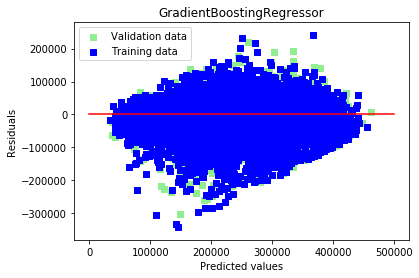

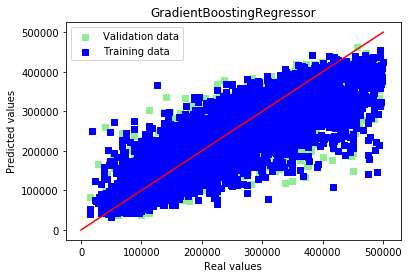

In [145]:
# Plot residuals
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.plot([0, 500000], [0, 0], c = "red")
plt.title("GradientBoostingRegressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.show()

# Plot predictions
plt.scatter(y_test,y_test_pred, c = "lightgreen", marker = "s", label = "Validation data")
plt.scatter(y_train,y_train_pred, c = "blue", marker = "s", label = "Training data")
plt.plot([0, 500000], [0, 500000], c = "red")
plt.title("GradientBoostingRegressor")
plt.ylabel("Predicted values")
plt.xlabel("Real values")
plt.legend(loc = "upper left")
plt.show()  

### IV-Random Forest Regressor

In [146]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=999)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

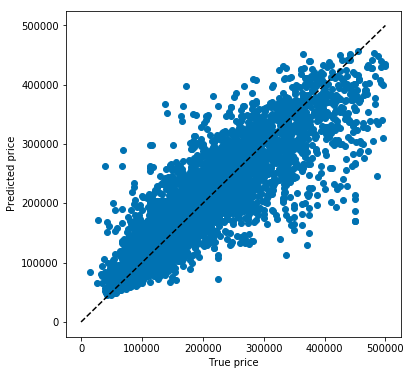

In [147]:
plt.figure(figsize=(6,6));
plt.scatter(y_test, y_pred);
plt.plot([0, 500001], [0, 500001], '--k');
plt.axis('tight');
plt.xlabel('True price');
plt.ylabel('Predicted price');

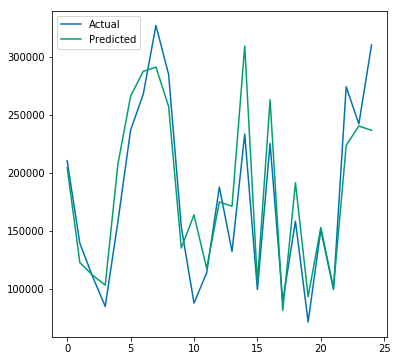

In [148]:
res_forest = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
res_forest = res_forest.reset_index()
res_forest = res_forest.drop(['index'],axis=1)

plt.figure(figsize=(6,6));
plt.plot(res_forest[:25]);
plt.legend(['Actual','Predicted']);

In [149]:
y_train_pred = forest_reg.predict(X_train);
y_test_pred = forest_reg.predict(X_test)
dfRandomForestRegressor = pd.DataFrame([(np.sqrt(mean_squared_error(y_train,y_train_pred)),np.sqrt(mean_squared_error(y_test, y_test_pred))),
                    (r2_score(y_train, y_train_pred),     r2_score(y_test, y_test_pred)),
                    (mean_absolute_error(y_train, y_train_pred),   mean_absolute_error(y_test, y_test_pred))],
                   index=['Root Mean Squared Error (RMSE)', 'Coefficient of determination (R-squared)', 'Mean Absolute Error (MAE)'],
                   columns=('Training set', 'Test set'))
dfRandomForestRegressor

,Training set,Test set
Root Mean Squared Error (RMSE),19917.908432,45392.752745
Coefficient of determination (R-squared),0.956433,0.772827
Mean Absolute Error (MAE),12763.633415,31043.220927


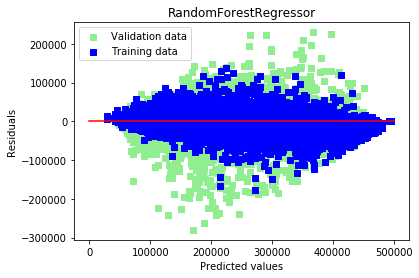

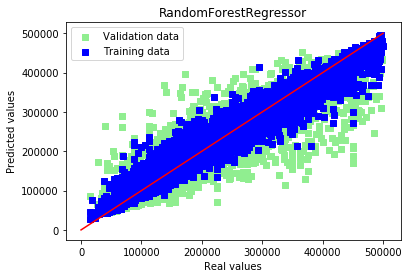

In [150]:
# Plot residuals
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.plot([0, 500000], [0, 0], c = "red")
plt.title("RandomForestRegressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.show()

# Plot predictions
plt.scatter(y_test,y_test_pred, c = "lightgreen", marker = "s", label = "Validation data")
plt.scatter(y_train,y_train_pred, c = "blue", marker = "s", label = "Training data")
plt.plot([0, 500000], [0, 500000], c = "red")
plt.title("RandomForestRegressor")
plt.ylabel("Predicted values")
plt.xlabel("Real values")
plt.legend(loc = "upper left")
plt.show()  

## Scores

In [151]:
from sklearn.model_selection import cross_val_score
model_score = pd.DataFrame(columns=["Model","Score","Score Variation"])
def model_score_add(modelname,model):
    scores = cross_val_score(model,X_test,y_test,cv=10)
    #Scores on test data
    name=modelname
    score=scores.mean()
    score_std = scores.std()
    model_score.loc[len(model_score)]=[modelname,score,score_std]

In [152]:
model_score_add("Liner Regression",lin_reg)
model_score_add("Decision Tree",decisiontree_reg)
model_score_add("Gradient Boosting Regression",gbp_reg)
model_score_add("Random Forest Regressor",forest_reg)
model_score

,Model,Score,Score Variation
0,Liner Regression,0.650813,0.032827
1,Decision Tree,0.522331,0.039739
2,Gradient Boosting Regression,0.759730,0.025727
3,Random Forest Regressor,0.737482,0.026353


## Exporting to Excel

In [153]:
writer = pd.ExcelWriter('/Users/Jeremymeyer/Desktop/output.xlsx', engine = 'xlsxwriter') #change with the appropriate path
df.to_excel(writer, sheet_name = 'Data', index=False)
dfLinearRegression.to_excel(writer, sheet_name = 'Linear Regression', index=True)
dfDecisionTreeRegressor.to_excel(writer, sheet_name = 'Decision Tree Regressor', index=True)
dfGradientBoostingRegressor.to_excel(writer, sheet_name = 'Gradient Boost Regressor', index=True)
dfRandomForestRegressor.to_excel(writer, sheet_name = 'Random Forest Regressor', index=False)
model_score.to_excel(writer, sheet_name = 'Scores', index=False)
writer.save()
writer.close()